最適化アルゴリズムの比較がしたい。そのために、いい感じに凸凹した関数を作りたい。というニーズを満たすために、指定した場所に指定した向きに傾いた放物面を定義する。

In [1]:
import numpy as np
import matplotlib.pyplot as plt

回転行列。

$$
\left(
\begin{matrix}
\cos \theta & -\sin \theta \\
\sin \theta & \cos \theta
\end{matrix}
\right)
$$

で、平面を$\theta$だけ回転させる行列になる。

In [10]:
def rotation_matrix(th):
    ret = np.zeros((2,2))
    ret[0,0], ret[0,1] = np.cos(th), -np.sin(th)
    ret[1,0], ret[1,1] = np.sin(th), np.cos(th)
    return ret

ちゃんと回転になっているかをチェック。

In [11]:
x = np.array([1,0]).reshape((2,1))
R = rotation_matrix(theta)

(-1, 1)

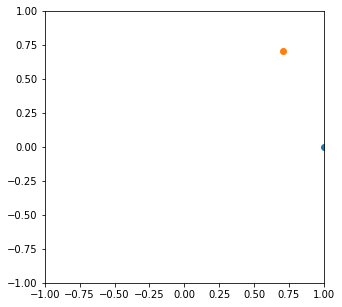

In [12]:
fig, ax = plt.subplots(figsize=(5,5))
ax.scatter(x[0], x[1])
x2 = np.dot(R, x)
ax.scatter(x2[0], x2[1])
ax.set_xlim((-1,1))
ax.set_ylim((-1,1))

青い点が原点を中心に45°回転してオレンジの点になっている。

点(a,b)を中心に、$\theta$だけ傾いた放物面を計算するには、

1. (-a, -b)だけ平行移動して
1. $-\theta$だけ回転して
1. $\alpha x^2 + \beta y^2$ を計算する

とすれば良い。$\alpha, \beta$を小さくすると$x, y$の方向に伸びた放物面となる。

In [13]:
def quadratic(x, y, theta, a, b, alpha, beta):
    """
    中心が(a, b)で、thetaだけ傾いた2次形式を計算する
    """
    x = x - a
    y = y - b
    xy = np.vstack(([x], [y]))
    xy = np.tensordot(rotation_matrix(-theta), xy, (1, 0))
    xy = xy ** 2
    xy[0] *= alpha
    xy[1] *= beta
    return np.sum(xy, axis=0)

(10, 15)を中心に、45°傾いた、横に伸びた放物面を計算してみる。

In [16]:
theta = np.pi / 4
a, b = 10, 15
alpha, beta = .2, 2
x = np.linspace(-20,20,30)
y = np.linspace(-20,20,30)
x, y = np.meshgrid(x, y)
z = quadratic(x, y, theta, a, b, alpha, beta)

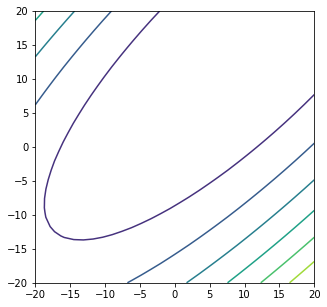

In [15]:
fig, ax = plt.subplots(figsize=(5,5))
ax.contour(x,y,z)

目的のものが得られた。